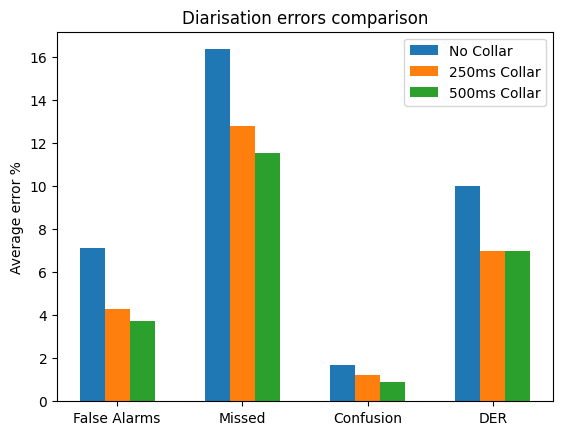

In [38]:
import matplotlib.pyplot as plt
import numpy as np

categories = ["False Alarms", "Missed", "Confusion", "DER"]
no_collar = [7.11, 16.35, 1.68, 10]
collar_250 = [4.27, 12.78, 1.24, 7]
collar_500 = [3.74, 11.51, 0.9, 7]

x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, no_collar, width, label="No Collar")
bars2 = ax.bar(x, collar_250, width, label="250ms Collar")
bars3 = ax.bar(x + width, collar_500, width, label="500ms Collar")

ax.set_ylabel("Average error %")
ax.set_title("Diarisation errors comparison")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.savefig("pyannoteBench")
plt.show()

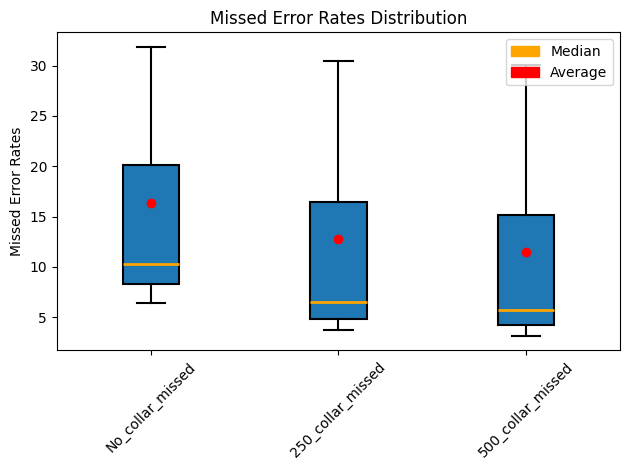

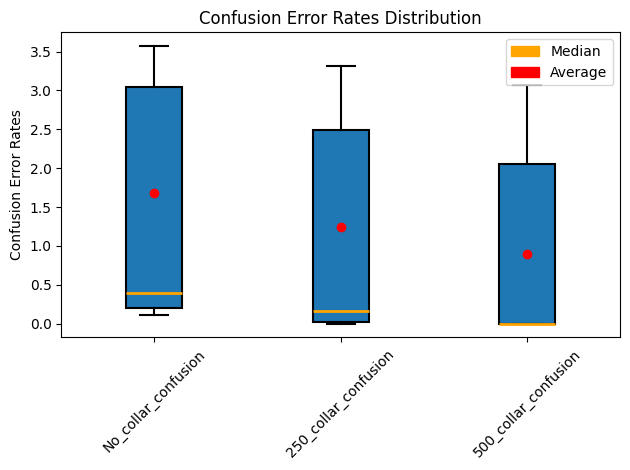

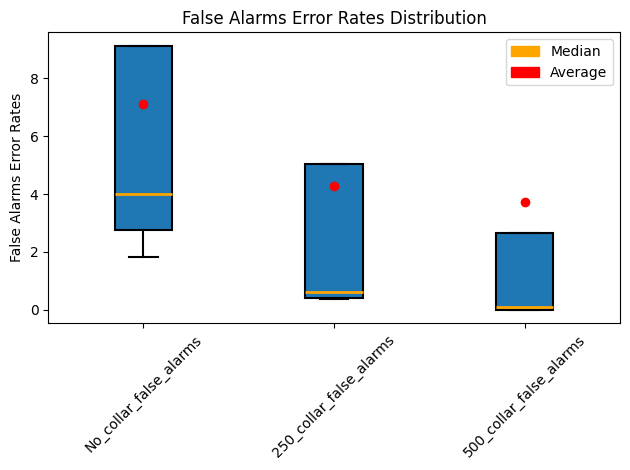

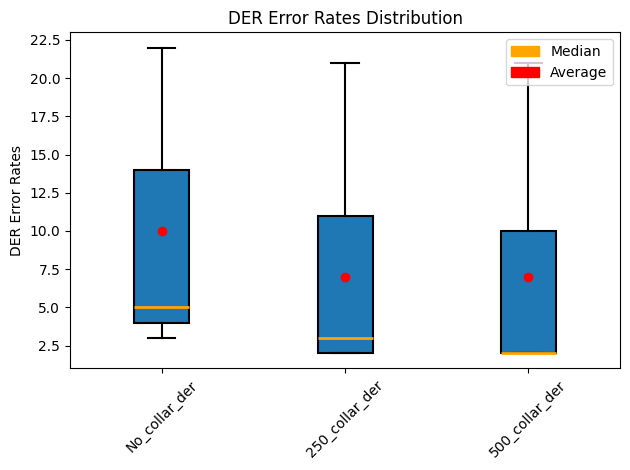

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data for box plots
data = {
    "No_collar_false_alarms": {
        "average": 7.11,
        "stdev": 9.09,
        "median": 4.01,
        "max": 27.34,
        "min": 1.83,
        "q1": 2.75,
        "q3": 9.13,
    },
    "No_collar_missed": {
        "average": 16.35,
        "stdev": 10.07,
        "median": 10.31,
        "max": 31.86,
        "min": 6.45,
        "q1": 8.28,
        "q3": 20.13,
    },
    "No_collar_confusion": {
        "average": 1.68,
        "stdev": 1.74,
        "median": 0.39,
        "max": 3.57,
        "min": 0.11,
        "q1": 0.20,
        "q3": 3.05,
    },
    "No_collar_der": {
        "average": 10,
        "stdev": 7,
        "median": 5,
        "max": 22,
        "min": 3,
        "q1": 4,
        "q3": 14,
    },
    "250_collar_false_alarms": {
        "average": 4.27,
        "stdev": 9.74,
        "median": 0.63,
        "max": 26.35,
        "min": 0.37,
        "q1": 0.42,
        "q3": 5.02,
    },
    "250_collar_missed": {
        "average": 12.78,
        "stdev": 9.94,
        "median": 6.52,
        "max": 30.42,
        "min": 3.77,
        "q1": 4.83,
        "q3": 16.43,
    },
    "250_collar_confusion": {
        "average": 1.24,
        "stdev": 1.48,
        "median": 0.16,
        "max": 3.32,
        "min": 0.0,
        "q1": 0.02,
        "q3": 2.49,
    },
    "250_collar_der": {
        "average": 7,
        "stdev": 7,
        "median": 3,
        "max": 21,
        "min": 2,
        "q1": 2,
        "q3": 11,
    },
    "500_collar_false_alarms": {
        "average": 3.74,
        "stdev": 9.72,
        "median": 0.09,
        "max": 25.79,
        "min": 0.0,
        "q1": 0.0,
        "q3": 2.65,
    },
    "500_collar_missed": {
        "average": 11.51,
        "stdev": 9.63,
        "median": 5.73,
        "max": 30.03,
        "min": 3.17,
        "q1": 4.26,
        "q3": 15.13,
    },
    "500_collar_confusion": {
        "average": 0.9,
        "stdev": 1.22,
        "median": 0.0,
        "max": 3.07,
        "min": 0.0,
        "q1": 0.0,
        "q3": 2.06,
    },
    "500_collar_der": {
        "average": 7,
        "stdev": 7,
        "median": 2,
        "max": 21,
        "min": 2,
        "q1": 2,
        "q3": 10,
    },
}


def plot_boxplot(categories, title, ylabel, save_as):
    fig, ax = plt.subplots()

    positions = range(1, len(categories) + 1)
    box_plot_data = [
        [
            data[category]["min"],
            data[category]["q1"],
            data[category]["median"],
            data[category]["q3"],
            data[category]["max"],
        ]
        for category in categories
    ]

    bp = ax.boxplot(
        box_plot_data,
        vert=True,
        patch_artist=True,
        showmeans=False,
        showfliers=False,
        whiskerprops={"linewidth": 1.5},
        capprops={"linewidth": 1.5},
        boxprops={"linewidth": 1.5},
        medianprops={"linewidth": 2, "color": "orange"},
        positions=positions,
    )

    for i, category in enumerate(categories):
        ax.plot(i + 1, data[category]["average"], "ro")

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xticks(positions)
    ax.set_xticklabels(categories, rotation=45)

    median_patch = mpatches.Patch(color="orange", label="Median")
    average_patch = mpatches.Patch(color="red", label="Average")
    ax.legend(handles=[median_patch, average_patch], loc="upper right")

    plt.tight_layout()
    plt.savefig(save_as)
    plt.show()


# Define categories for each plot
missed_categories = ["No_collar_missed", "250_collar_missed", "500_collar_missed"]
confusion_categories = [
    "No_collar_confusion",
    "250_collar_confusion",
    "500_collar_confusion",
]
false_alarm_categories = [
    "No_collar_false_alarms",
    "250_collar_false_alarms",
    "500_collar_false_alarms",
]
der_categories = ["No_collar_der", "250_collar_der", "500_collar_der"]

# Plot and save each boxplot
plot_boxplot(
    missed_categories,
    "Missed Error Rates Distribution",
    "Missed Error Rates",
    "missed_error_rates_box_plot.png",
)
plot_boxplot(
    confusion_categories,
    "Confusion Error Rates Distribution",
    "Confusion Error Rates",
    "confusion_error_rates_box_plot.png",
)
plot_boxplot(
    false_alarm_categories,
    "False Alarms Error Rates Distribution",
    "False Alarms Error Rates",
    "false_alarms_error_rates_box_plot.png",
)
plot_boxplot(
    der_categories,
    "DER Error Rates Distribution",
    "DER Error Rates",
    "der_error_rates_box_plot.png",
)

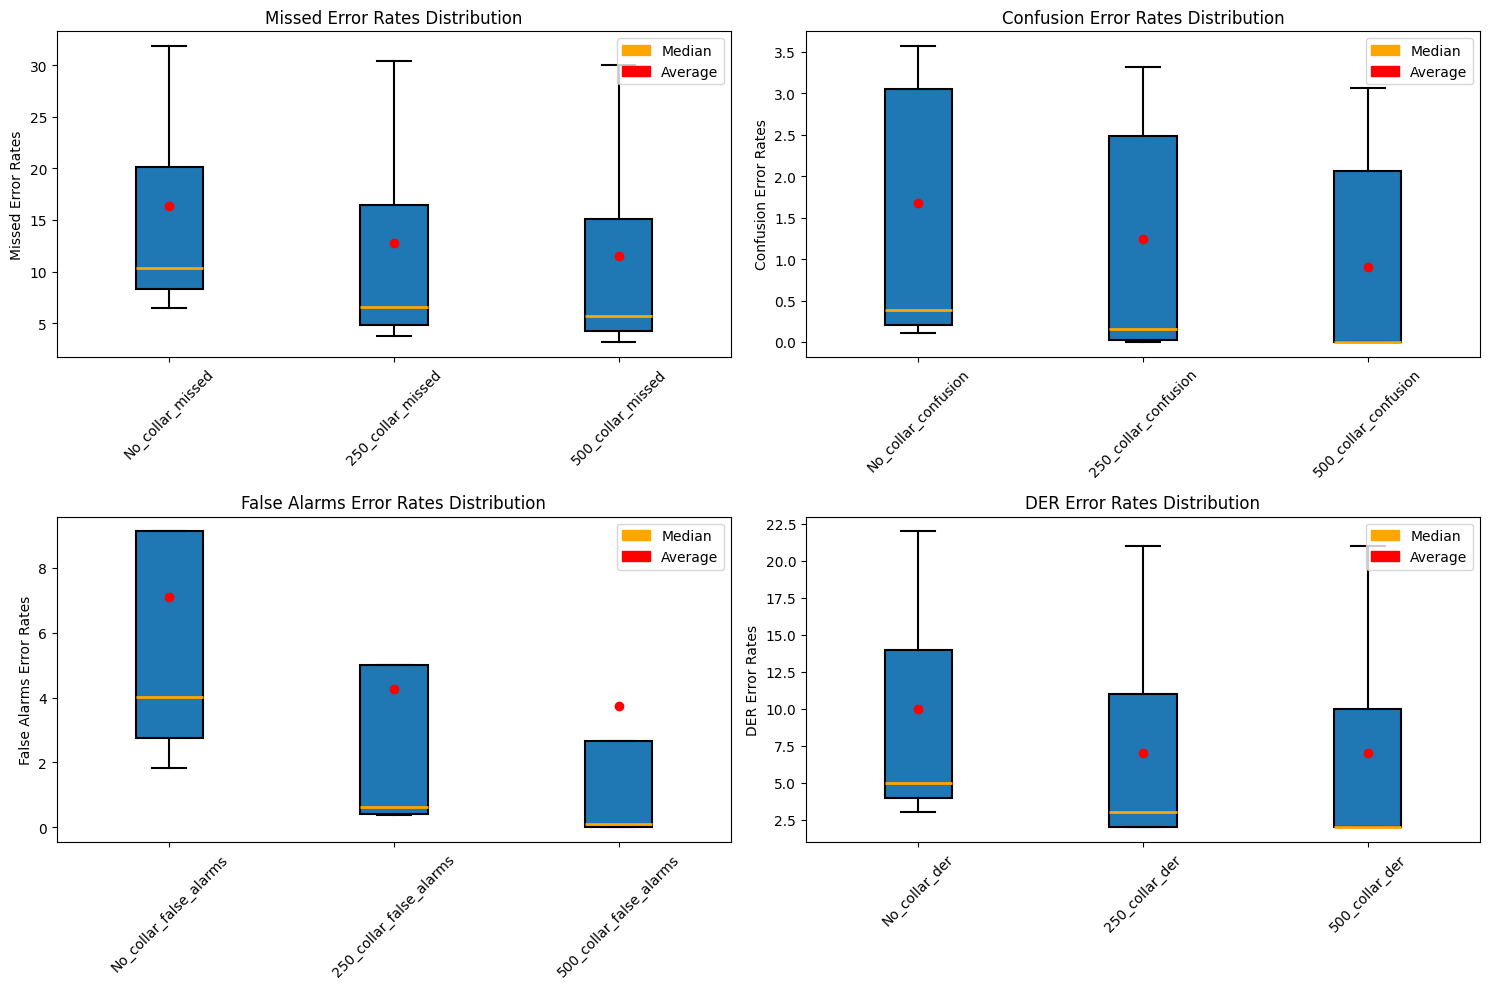

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data for box plots
data = {
    "No_collar_false_alarms": {
        "average": 7.11,
        "stdev": 9.09,
        "median": 4.01,
        "max": 27.34,
        "min": 1.83,
        "q1": 2.75,
        "q3": 9.13,
    },
    "No_collar_missed": {
        "average": 16.35,
        "stdev": 10.07,
        "median": 10.31,
        "max": 31.86,
        "min": 6.45,
        "q1": 8.28,
        "q3": 20.13,
    },
    "No_collar_confusion": {
        "average": 1.68,
        "stdev": 1.74,
        "median": 0.39,
        "max": 3.57,
        "min": 0.11,
        "q1": 0.20,
        "q3": 3.05,
    },
    "No_collar_der": {
        "average": 10,
        "stdev": 7,
        "median": 5,
        "max": 22,
        "min": 3,
        "q1": 4,
        "q3": 14,
    },
    "250_collar_false_alarms": {
        "average": 4.27,
        "stdev": 9.74,
        "median": 0.63,
        "max": 26.35,
        "min": 0.37,
        "q1": 0.42,
        "q3": 5.02,
    },
    "250_collar_missed": {
        "average": 12.78,
        "stdev": 9.94,
        "median": 6.52,
        "max": 30.42,
        "min": 3.77,
        "q1": 4.83,
        "q3": 16.43,
    },
    "250_collar_confusion": {
        "average": 1.24,
        "stdev": 1.48,
        "median": 0.16,
        "max": 3.32,
        "min": 0.0,
        "q1": 0.02,
        "q3": 2.49,
    },
    "250_collar_der": {
        "average": 7,
        "stdev": 7,
        "median": 3,
        "max": 21,
        "min": 2,
        "q1": 2,
        "q3": 11,
    },
    "500_collar_false_alarms": {
        "average": 3.74,
        "stdev": 9.72,
        "median": 0.09,
        "max": 25.79,
        "min": 0.0,
        "q1": 0.0,
        "q3": 2.65,
    },
    "500_collar_missed": {
        "average": 11.51,
        "stdev": 9.63,
        "median": 5.73,
        "max": 30.03,
        "min": 3.17,
        "q1": 4.26,
        "q3": 15.13,
    },
    "500_collar_confusion": {
        "average": 0.9,
        "stdev": 1.22,
        "median": 0.0,
        "max": 3.07,
        "min": 0.0,
        "q1": 0.0,
        "q3": 2.06,
    },
    "500_collar_der": {
        "average": 7,
        "stdev": 7,
        "median": 2,
        "max": 21,
        "min": 2,
        "q1": 2,
        "q3": 10,
    },
}


def plot_boxplot(ax, categories, title, ylabel):
    positions = range(1, len(categories) + 1)
    box_plot_data = [
        [
            data[category]["min"],
            data[category]["q1"],
            data[category]["median"],
            data[category]["q3"],
            data[category]["max"],
        ]
        for category in categories
    ]

    bp = ax.boxplot(
        box_plot_data,
        vert=True,
        patch_artist=True,
        showmeans=False,
        showfliers=False,
        whiskerprops={"linewidth": 1.5},
        capprops={"linewidth": 1.5},
        boxprops={"linewidth": 1.5},
        medianprops={"linewidth": 2, "color": "orange"},
        positions=positions,
    )

    for i, category in enumerate(categories):
        ax.plot(i + 1, data[category]["average"], "ro")

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xticks(positions)
    ax.set_xticklabels(categories, rotation=45)

    median_patch = mpatches.Patch(color="orange", label="Median")
    average_patch = mpatches.Patch(color="red", label="Average")
    ax.legend(handles=[median_patch, average_patch], loc="upper right")


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define categories for each subplot
missed_categories = ["No_collar_missed", "250_collar_missed", "500_collar_missed"]
confusion_categories = [
    "No_collar_confusion",
    "250_collar_confusion",
    "500_collar_confusion",
]
false_alarm_categories = [
    "No_collar_false_alarms",
    "250_collar_false_alarms",
    "500_collar_false_alarms",
]
der_categories = ["No_collar_der", "250_collar_der", "500_collar_der"]

# Plot each subplot
plot_boxplot(
    axs[0, 0],
    missed_categories,
    "Missed Error Rates Distribution",
    "Missed Error Rates",
)
plot_boxplot(
    axs[0, 1],
    confusion_categories,
    "Confusion Error Rates Distribution",
    "Confusion Error Rates",
)
plot_boxplot(
    axs[1, 0],
    false_alarm_categories,
    "False Alarms Error Rates Distribution",
    "False Alarms Error Rates",
)
plot_boxplot(
    axs[1, 1], der_categories, "DER Error Rates Distribution", "DER Error Rates"
)

plt.tight_layout()
plt.savefig("error_rates_box_plots.png")
plt.show()

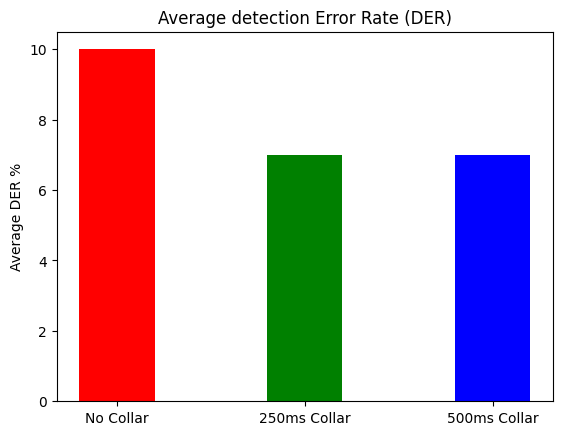

In [39]:
import matplotlib.pyplot as plt
import numpy as np

categories = ["No Collar", "250ms Collar", "500ms Collar"]
der_values = [10, 7, 7]

x = np.arange(len(categories))

width = 0.4

fig, ax = plt.subplots()
bars = ax.bar(x, der_values, width, color=["red", "green", "blue"])

ax.set_ylabel("Average DER %")
ax.set_title("Average detection Error Rate (DER)")
ax.set_xticks(x)
ax.set_xticklabels(categories)

plt.show()

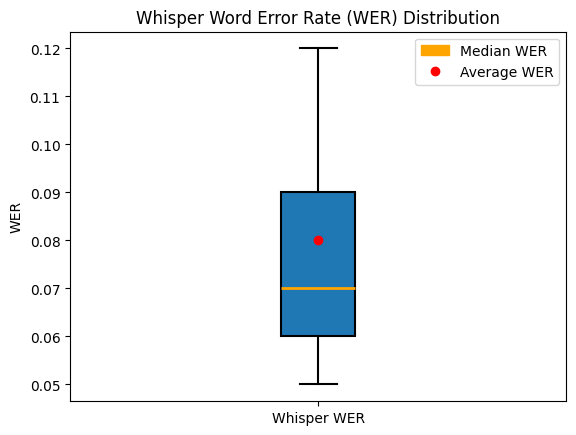

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

wer_data = {
    "Average WER": 0.08,
    "WER Stdev": 0.03,
    "WER Variance": 0.0,
    "WER Median": 0.07,
    "WER Max": 0.12,
    "WER Min": 0.05,
}

fig, ax = plt.subplots()

q1 = 0.06
q3 = 0.09
box_plot_data = [
    wer_data["WER Min"],
    q1,
    wer_data["WER Median"],
    q3,
    wer_data["WER Max"],
]

ax.boxplot(
    [box_plot_data],
    vert=True,
    patch_artist=True,
    showmeans=False,
    showfliers=False,
    whiskerprops={"linewidth": 1.5},
    capprops={"linewidth": 1.5},
    boxprops={"linewidth": 1.5},
    medianprops={"linewidth": 2, "color": "orange"},
)

ax.set_title("Whisper Word Error Rate (WER) Distribution")
ax.set_ylabel("WER")
ax.set_xticklabels(["Whisper WER"])

average_wer = ax.plot(1, wer_data["Average WER"], "ro", label="Average WER")

median_patch = mpatches.Patch(color="orange", label="Median WER")
plt.legend(handles=[median_patch, average_wer[0]], loc="upper right")

plt.savefig("whisperBench")
plt.show()